<a href="https://colab.research.google.com/github/krakowiakpawel9/neural-network-course/blob/master/06_cnn/01_image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Image Preprocessing - przygotowanie obrazów

**Augmentacja danych** - technika pozwalająca na zwiększenie zbioru treningowego przez odpowiednie przekształcenia danych wejsciowych. Technika bardzo przydtna zwłaszcza gdy nie mamy wystarczającej ilości danych do wytrenowania sieci. W uczeniu głębokim im więcej posiadamy danych treningowych tym teoretycznie lepiej jesteśmy w stanie wytrenować sieć. Wykorzystamy tą technikę do trenowania problemów związanych z przetwarzaniem obrazu.

Biblioteka Keras dostarcza narzędzia do augmentacji danych, które działają automatycznie podczas trenowania sieci. Możemy to zrobić dzięki klasie **ImageDataGenerator**.

In [0]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
from numpy import expand_dims

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TensorFlow 2.x selected.


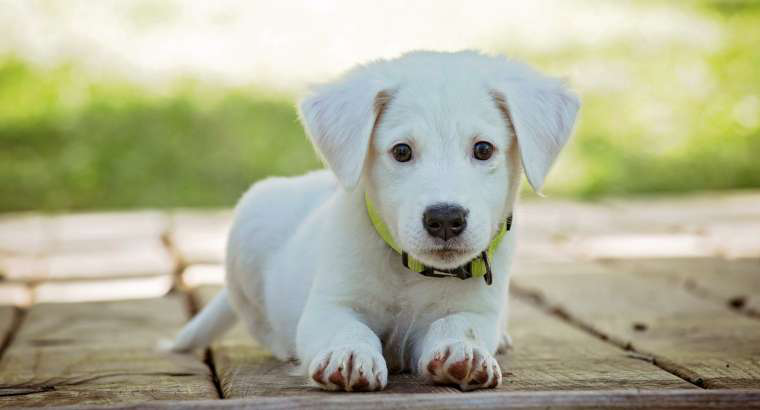

In [0]:
img = load_img('dog.jpeg')
img

In [0]:
data = img_to_array(img)
data.shape

(410, 760, 3)

In [0]:
data

array([[[239., 238., 220.],
        [239., 238., 220.],
        [239., 238., 220.],
        ...,
        [150., 171.,  54.],
        [149., 170.,  53.],
        [148., 169.,  52.]],

       [[237., 236., 218.],
        [238., 237., 219.],
        [238., 237., 219.],
        ...,
        [147., 168.,  51.],
        [146., 167.,  50.],
        [146., 167.,  50.]],

       [[235., 234., 216.],
        [236., 235., 217.],
        [236., 235., 217.],
        ...,
        [144., 163.,  47.],
        [143., 162.,  46.],
        [143., 162.,  46.]],

       ...,

       [[ 97.,  79.,  55.],
        [ 93.,  75.,  51.],
        [ 90.,  72.,  48.],
        ...,
        [ 44.,  24.,  15.],
        [ 47.,  27.,  18.],
        [ 48.,  28.,  19.]],

       [[104.,  88.,  65.],
        [107.,  91.,  68.],
        [110.,  94.,  71.],
        ...,
        [ 46.,  26.,  15.],
        [ 45.,  25.,  14.],
        [ 44.,  24.,  13.]],

       [[109.,  92.,  72.],
        [112.,  95.,  75.],
        [115.,  

In [0]:
data[:, :, 0]

array([[239., 239., 239., ..., 150., 149., 148.],
       [237., 238., 238., ..., 147., 146., 146.],
       [235., 236., 236., ..., 144., 143., 143.],
       ...,
       [ 97.,  93.,  90., ...,  44.,  47.,  48.],
       [104., 107., 110., ...,  46.,  45.,  44.],
       [109., 112., 115., ...,  53.,  52.,  51.]], dtype=float32)

In [0]:
data[:, :, 1]

array([[238., 238., 238., ..., 171., 170., 169.],
       [236., 237., 237., ..., 168., 167., 167.],
       [234., 235., 235., ..., 163., 162., 162.],
       ...,
       [ 79.,  75.,  72., ...,  24.,  27.,  28.],
       [ 88.,  91.,  94., ...,  26.,  25.,  24.],
       [ 92.,  95.,  98., ...,  33.,  32.,  31.]], dtype=float32)

In [0]:
data[:, :, 2]

array([[220., 220., 220., ...,  54.,  53.,  52.],
       [218., 219., 219., ...,  51.,  50.,  50.],
       [216., 217., 217., ...,  47.,  46.,  46.],
       ...,
       [ 55.,  51.,  48., ...,  15.,  18.,  19.],
       [ 65.,  68.,  71., ...,  15.,  14.,  13.],
       [ 72.,  75.,  78., ...,  22.,  21.,  20.]], dtype=float32)

In [0]:
samples = expand_dims(data, 0)
samples

array([[[[239., 238., 220.],
         [239., 238., 220.],
         [239., 238., 220.],
         ...,
         [150., 171.,  54.],
         [149., 170.,  53.],
         [148., 169.,  52.]],

        [[237., 236., 218.],
         [238., 237., 219.],
         [238., 237., 219.],
         ...,
         [147., 168.,  51.],
         [146., 167.,  50.],
         [146., 167.,  50.]],

        [[235., 234., 216.],
         [236., 235., 217.],
         [236., 235., 217.],
         ...,
         [144., 163.,  47.],
         [143., 162.,  46.],
         [143., 162.,  46.]],

        ...,

        [[ 97.,  79.,  55.],
         [ 93.,  75.,  51.],
         [ 90.,  72.,  48.],
         ...,
         [ 44.,  24.,  15.],
         [ 47.,  27.,  18.],
         [ 48.,  28.,  19.]],

        [[104.,  88.,  65.],
         [107.,  91.,  68.],
         [110.,  94.,  71.],
         ...,
         [ 46.,  26.,  15.],
         [ 45.,  25.,  14.],
         [ 44.,  24.,  13.]],

        [[109.,  92.,  72.],
       

In [0]:
samples.shape

(1, 410, 760, 3)

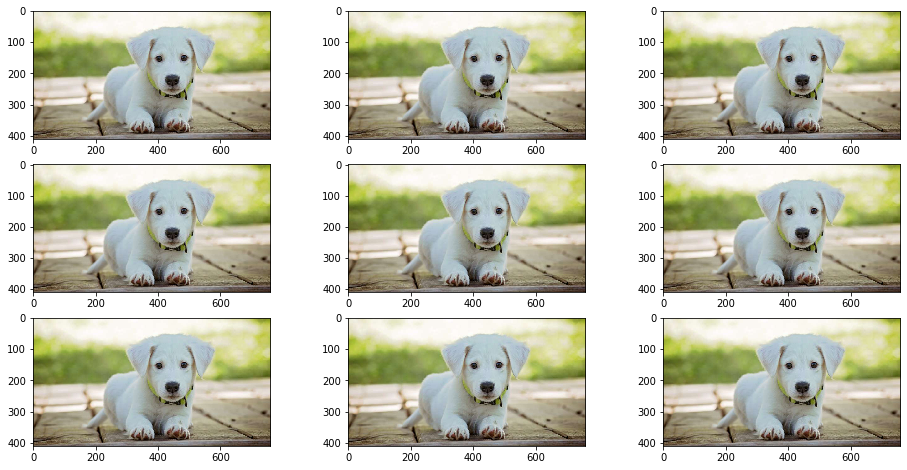

In [0]:
datagen = ImageDataGenerator()

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

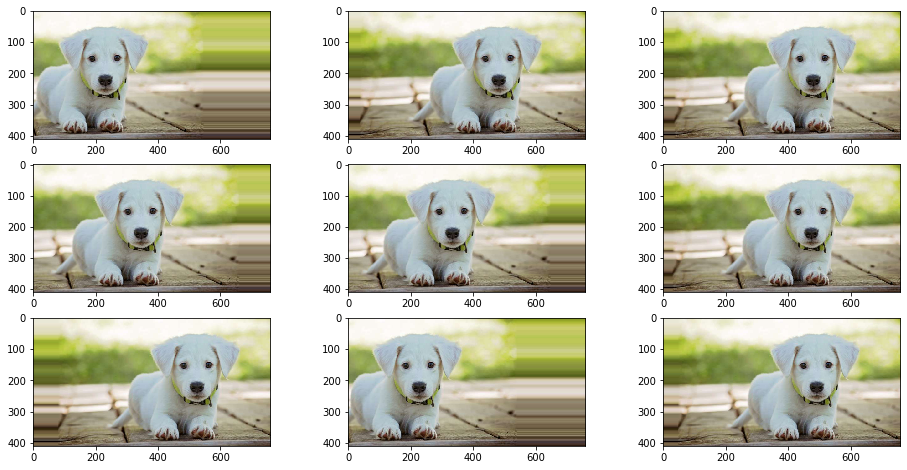

In [0]:
datagen = ImageDataGenerator(width_shift_range=0.3)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

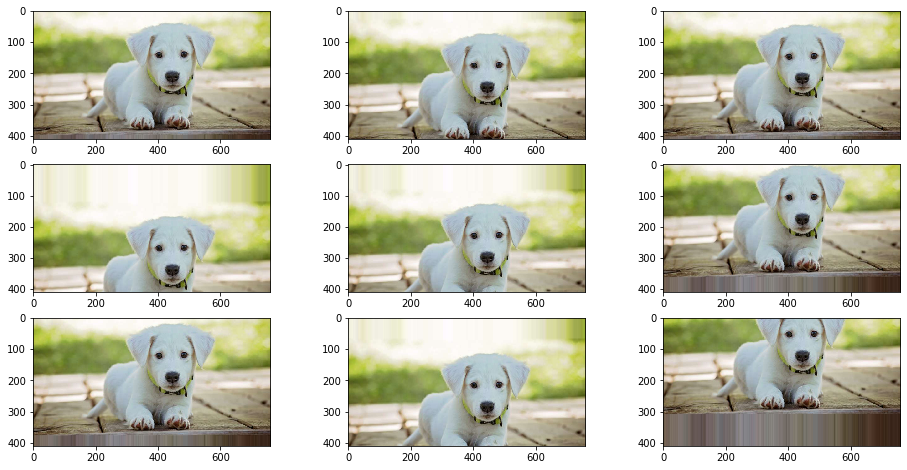

In [0]:
datagen = ImageDataGenerator(height_shift_range=0.3)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

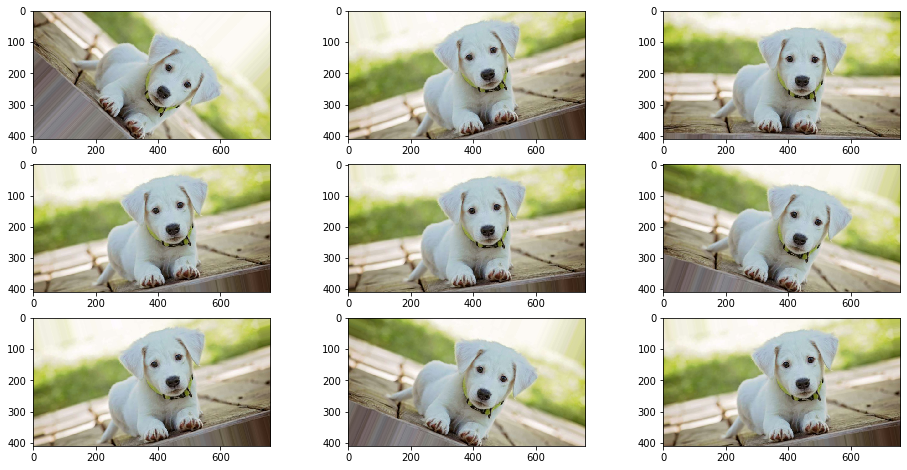

In [0]:
datagen = ImageDataGenerator(rotation_range=45)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

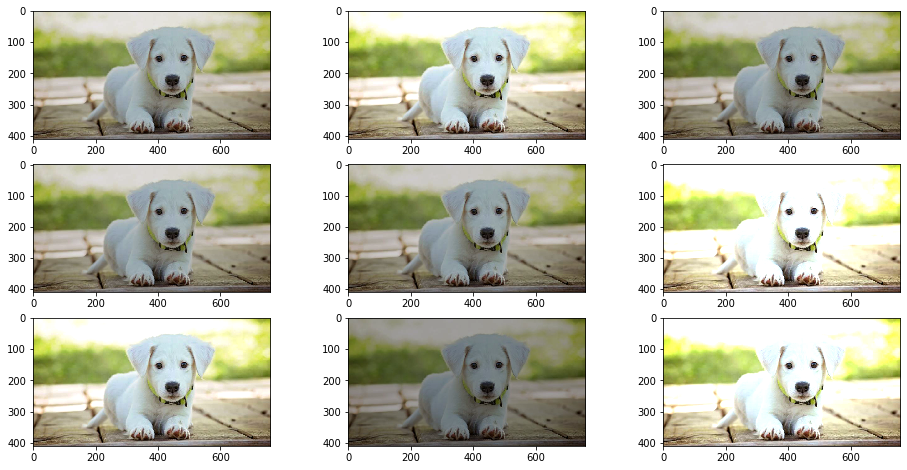

In [0]:
datagen = ImageDataGenerator(brightness_range=[0.4, 1.5])

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

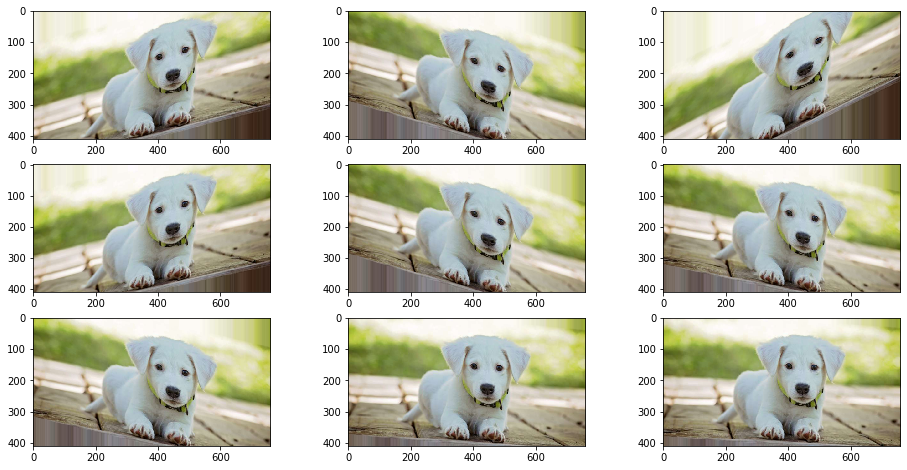

In [0]:
datagen = ImageDataGenerator(shear_range=30)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

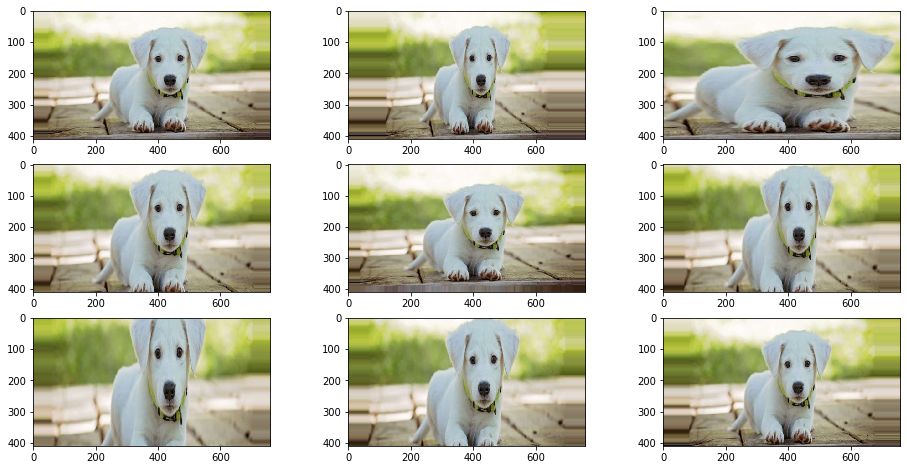

In [0]:
datagen = ImageDataGenerator(zoom_range=0.5)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

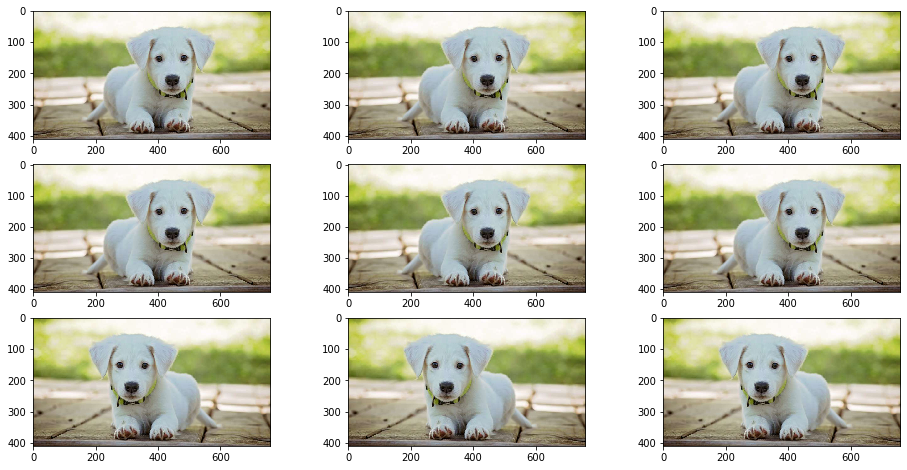

In [0]:
datagen = ImageDataGenerator(horizontal_flip=True)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

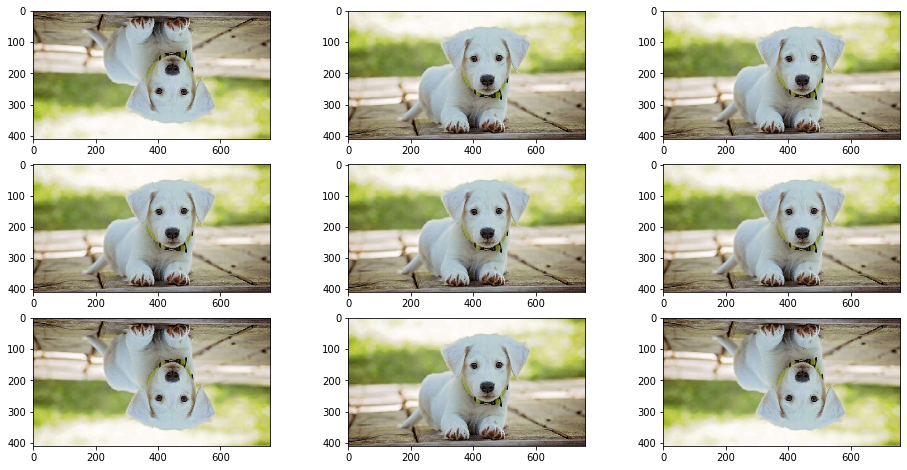

In [0]:
datagen = ImageDataGenerator(vertical_flip=True)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

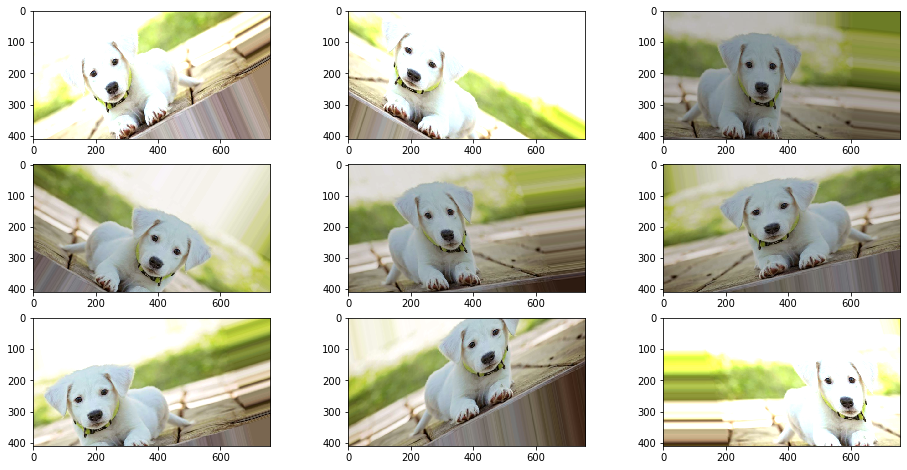

In [0]:
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=30,
                             brightness_range=[0.4, 1.5],
                             shear_range=20,
                             zoom_range=0.1,
                             horizontal_flip=True)

iterator = datagen.flow(samples, batch_size=1)

plt.figure(figsize=(16, 8))
for i in range(9):
    plt.subplot(330 + i + 1)
    batch = iterator.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()